#preprocessing data

In [ ]:
!wget 'http://data.csail.mit.edu/places/places365/val_256.tar'

--2021-05-17 07:27:40--  http://data.csail.mit.edu/places/places365/val_256.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525158400 (501M) [application/octet-stream]
Saving to: ‘val_256.tar’

val_256.tar          18%[==>                 ]  90.54M   144KB/s    eta 31m 40s^C


In [ ]:
!tar -xvf "/content/val_256.tar" -C "."     #[run this cell to extract tar files]

Streaming output truncated to the last 5000 lines.
val_256/Places365_val_00006906.jpg
val_256/Places365_val_00006574.jpg
val_256/Places365_val_00034263.jpg
val_256/Places365_val_00029116.jpg
val_256/Places365_val_00000498.jpg
val_256/Places365_val_00017666.jpg
val_256/Places365_val_00012138.jpg
val_256/Places365_val_00025171.jpg
val_256/Places365_val_00032428.jpg
val_256/Places365_val_00005461.jpg
val_256/Places365_val_00005813.jpg
val_256/Places365_val_00009874.jpg
val_256/Places365_val_00020188.jpg
val_256/Places365_val_00009406.jpg
val_256/Places365_val_00024731.jpg
val_256/Places365_val_00013778.jpg
val_256/Places365_val_00008993.jpg
val_256/Places365_val_00016026.jpg
val_256/Places365_val_00036291.jpg
val_256/Places365_val_00028756.jpg
val_256/Places365_val_00004586.jpg
val_256/Places365_val_00024096.jpg
val_256/Places365_val_00016781.jpg
val_256/Places365_val_00008246.jpg
val_256/Places365_val_00004221.jpg
val_256/Places365_val_00033268.jpg
val_256/Places365_val_00018375.jpg
val_

In [ ]:
import os

listofimg=os.listdir('./val_256')

In [ ]:
len(listofimg)

6643

In [ ]:
import PIL

val_dir='./val_256'

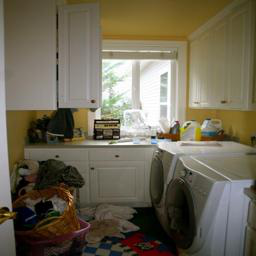

In [ ]:
PIL.Image.open(os.path.join(val_dir,listofimg[5]))

In [ ]:
print(PIL.Image.open(os.path.join(val_dir,listofimg[5])))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F89EF901B90>


In [ ]:
def removebw(listofimg,val_dir):
  newlist=[]
  removelist=[]
  for name in listofimg:
    img=PIL.Image.open(os.path.join(val_dir,name))
    if (img.mode=='RGB'):
      newlist.append(name)
    else:
      print(img.mode)
      removelist.append(name)
  return newlist,removelist

In [ ]:
newlist,removelist=removebw(listofimg,val_dir)

L
L
L
L
L
L
L
L
L
L
L
L
L
L


In [ ]:
print(len(listofimg),len(newlist))

6643 6629


In [ ]:
labels = open("places365_val.txt") 
labelstr=labels.read()
labellist=labelstr.splitlines()

FileNotFoundError: ignored

In [ ]:
# labellist

In [ ]:
labels=[]
for singlelabel in labellist:
  templist=singlelabel.split()
  labels.append(templist)

In [ ]:
labellist[0].split()

In [ ]:
labels

In [ ]:
len(removelist)

In [ ]:
i=0

newlistwithbwremoved=[]
for label in labels:
  c=0
  for rl in removelist:
    if (label[0]==rl):
      print(label[0],rl)
      i+=1
      c=1
      print(i)
  if (c==0):
    newlistwithbwremoved.append(label)

In [ ]:
newlistwithbwremoved

In [ ]:
len(newlistwithbwremoved)

In [ ]:
import shutil
if not os.path.exists('./val/'):
  os.mkdir('./val/')

for label in newlistwithbwremoved:
  if not os.path.exists(os.path.join('./val/',label[1])):
    os.mkdir('./val/'+label[1])
  shutil.copy( os.path.join(val_dir,label[0]) , os.path.join('./val/',label[1],label[0]) )

In [ ]:
val_dir

In [ ]:
folderlist=os.listdir('./val')

In [ ]:
# folderlist=list(map(int, folderlist))

In [ ]:
len(folderlist)

In [ ]:
for i in range(365):
  print(len(os.listdir('./val/'+str(i))),' images in ',i,' folder')

# algorithm

In [ ]:
# !unzip 'valtry.zip'

In [ ]:
import numpy as np
import PIL
from keras import Model,layers,Sequential
from keras.layers import Conv2D,UpSampling2D,InputLayer
import keras
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2lab, lab2rgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir='/content/val/'
test_dir='/content/val/'

In [ ]:
class customreshape(keras.layers.Layer):
  def __init__(self, **kwargs):
    super(customreshape,self).__init__()
  def call(self,input1,input2):
    # print(input1,input2)
    # print(x[1].shape)
    w=(0 if input1.shape[1]==None else input1.shape[1])
    h=(0 if input1.shape[2]==None else input1.shape[2])
    c=(0 if input1.shape[3]==None else input1.shape[3])
    # print(w,h,c)
    out=layers.Reshape((w,h,c))(input2)
    return out
  def get_config(self):
    return {"name": 'reshapebyanuj'}

In [ ]:
class customrepeat(keras.layers.Layer):
  def __init__(self, **kwargs):
    super(customrepeat,self).__init__()
  def call(self,input1,input2):
    # print(input1,input2)
    # x[0]=input1
    # x[1]=input2
    rvs=(0 if input1.shape[1]==None else input1.shape[1]*input1.shape[2])
    # print(rvs)
    out=layers.RepeatVector(rvs)(input2)
    return out
  def get_config(self):
    return {"name": 'repeatbyanuj'}

In [ ]:
tryvarold=K.placeholder((None,22,22,256))
tryvar=K.placeholder((None,256))
tryvar
customlayer=customrepeat()
x=customlayer(tryvarold,tryvar)
print(customlayer.get_config())
print(x)

{'name': 'repeatbyanuj'}
KerasTensor(type_spec=TensorSpec(shape=(None, 484, 256), dtype=tf.float32, name=None), name='customrepeat/repeat_vector/Tile:0', description="created by layer 'customrepeat'")


In [ ]:
resh=customreshape()
print(resh.get_config())
x=resh(tryvarold,x)
print(x)

{'name': 'reshapebyanuj'}
KerasTensor(type_spec=TensorSpec(shape=(None, 22, 22, 256), dtype=tf.float32, name=None), name='customreshape/reshape/Reshape:0', description="created by layer 'customreshape'")


In [ ]:
from keras import backend as K

x_input=layers.Input(shape=(None,None,1),name="b&w input")
x_input_class=layers.Input(shape=(224,224,1),name="b&w input to classify")
#################### 6 convolution layers encoder####################
l1=layers.Conv2D(64,(3,3),activation='relu',strides=2,padding='same',kernel_initializer=tf.keras.initializers.he_normal())
b1=layers.BatchNormalization()
l2=layers.Conv2D(128,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())
b2=layers.BatchNormalization()

l3=layers.Conv2D(128,(3,3),activation='relu',strides=2,padding='same',kernel_initializer=tf.keras.initializers.he_normal())
b3=layers.BatchNormalization()
l4=layers.Conv2D(256,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())
b4=layers.BatchNormalization()

l5=layers.Conv2D(256,(3,3),activation='relu',strides=2,padding='same',kernel_initializer=tf.keras.initializers.he_normal())
b5=layers.BatchNormalization()
encoder_out=layers.Conv2D(512,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())
b6=layers.BatchNormalization()
color_encode_out=b6(encoder_out( b5(l5( b4(l4( b3(l3( b2(l2( b1(l1(x_input)) )) )) )) )) ))
classification_encode_out=b6(encoder_out( b5(l5( b4(l4( b3(l3( b2(l2( b1(l1(x_input_class)) )) )) )) )) ))

# #######classification
# x=layers.Conv2D(32,(7,7),activation='relu',strides=1,padding='same')(x_input_class)
# x=layers.Conv2D(32,(7,7),activation='relu',strides=2,padding='same')(x)

# # x=layers.Conv2D(64,(5,5),activation='relu',strides=1,padding='same')(x)
# x=layers.Conv2D(64,(5,5),activation='relu',strides=1,padding='same')(x)
# x=layers.Conv2D(64,(5,5),activation='relu',strides=2,padding='same')(x)

# x=layers.Conv2D(64,(3,3),activation='relu',strides=1,padding='same')(x)
# x=layers.Conv2D(64,(3,3),activation='relu',strides=2,padding='same')(x)
# x=layers.Flatten()(x)

x=layers.Conv2D(512,(3,3),activation='relu',strides=2,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(classification_encode_out)
x=layers.BatchNormalization()(x)
x=layers.Conv2D(512,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(512,(3,3),activation='relu',strides=2,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)
x=layers.Conv2D(512,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)
# x=layers.GlobalAveragePooling2D()(x)#use this to make classification input size also dynamic
x=layers.Flatten()(x)
x=layers.Dense(1024,activation='relu',kernel_initializer=tf.keras.initializers.he_normal())(x)
classification=layers.Dense(1024,activation='relu',kernel_initializer=tf.keras.initializers.he_normal())(x)#512
to_encoder_out=layers.Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal())(classification)

x=layers.Dense(1024,activation='relu',kernel_initializer=tf.keras.initializers.he_normal())(classification)
x=layers.Dense(1024,activation='relu',kernel_initializer=tf.keras.initializers.he_normal())(x)
class_out=layers.Dense(len(os.listdir(train_dir)),activation='softmax',name='classesoutput')(x)##########  number of classes


# to_encoder_out=layers.Dense(128,activation='relu')(x_to_encoder_out)
# print(encoder_out.shape[1])
# print(None if encoder_out.shape[1]==None else encoder_out.shape[1]*encoder_out.shape[2])
x=layers.Conv2D(512,(3,3),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.he_normal())(color_encode_out)
x=layers.BatchNormalization()(x)
x=layers.Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
color_encode_out=layers.BatchNormalization()(x)
###above is mid level features

# repeatvecshape=(None if color_encode_out.shape[1]==None else color_encode_out.shape[1]*color_encode_out.shape[2])
# repeatvecshape=K.shape(color_encode_out)[2]*K.shape(color_encode_out)[2]
# print(repeatvecshape/color_encode_out.shape[1])
# print('repeatvecshape',repeatvecshape)
# print('seee thisss',K.int_shape(color_encode_out)[1])
# print('seee thisss',K.shape(color_encode_out)[2])
# print('seee thisss',K.shape(color_encode_out)[3])
# print((K.shape(color_encode_out)[1]*K.shape(color_encode_out)[1]))
# print(to_encoder_out)
# print(color_encode_out)
# print(K.shape(color_encode_out)[-1])
# tf.print('l2',l2.shape)


# x=layers.Lambda(repeatvec,name='repeat_layer')((color_encode_out,to_encoder_out))#old work
# print("numberofrepeats",x)
customlayer=customrepeat()
x=customlayer(color_encode_out,to_encoder_out)
# # # print(repeatvec((color_encode_out,to_encoder_out)),"see me")
# # # x=layers.RepeatVector(numberofrepeats)(to_encoder_out)
# # # print(to_encoder_out)
# # # x=layers.Lambda(lambda to_encoder_out: K.repeat_elements(K.expand_dims(to_encoder_out, axis=1), None, 1))(to_encoder_out)
# # # x=layers.RepeatVector((encoder_out.shape[1])*(encoder_out.shape[2]))(to_encoder_out)


# x=layers.Lambda(reshape,name='reshape_layer')((x,color_encode_out))##old work
resh=customreshape()
x=resh(color_encode_out,x)
x=layers.Concatenate()([color_encode_out,x])
x=layers.Conv2D(256,(1,1),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)
#################decoder
x=layers.Conv2D(128,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)

x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(64,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)
x=layers.Conv2D(64,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)

x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=tf.keras.initializers.he_normal())(x)
x=layers.BatchNormalization()(x)

y=layers.Conv2D(2,(3,3),activation='tanh',padding='same',name="colorization_out",kernel_initializer=tf.keras.initializers.glorot_normal())(x)
y=layers.UpSampling2D((2,2))(y)

# x=layers.UpSampling2D((2,2))(color_encode_out)
# x=layers.UpSampling2D((2,2))(x)
# x=layers.UpSampling2D((2,2))(x)
# y=layers.Conv2D(2,(1,1),activation='tanh')(x)
model=Model([x_input,x_input_class],[y,class_out])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
b&w input (InputLayer)          [(None, None, None,  0                                            
__________________________________________________________________________________________________
b&w input to classify (InputLay [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 multiple             640         b&w input[0][0]                  
                                                                 b&w input to classify[0][0]      
__________________________________________________________________________________________________
batch_normalization (BatchNorma multiple             256         conv2d[0][0]                 

In [ ]:
testx=np.zeros([5,512,512,1])
testxclass=np.zeros([5,224,224,1])
print('input shape',testx.shape)
[y1,y2]=model.predict([testx,testxclass])
print('colors shape',y1.shape)
print('classes shape',y2.shape)
# y1.numpy()

input shape (5, 512, 512, 1)
colors shape (5, 512, 512, 2)
classes shape (5, 365)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,  # This is the source directory for training images
#         target_size=(150, 150),  # All images will be resized to 150x150
#         batch_size=20,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='categorical')

# # Flow validation images in batches of 20 using val_datagen generator
# validation_generator = val_datagen.flow_from_directory(
#         test_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='categorical')
batch_size = 32
from tensorflow.keras.utils import Sequence

class Mydata(Sequence):
  def __init__(self, image_path,
                batch_size=16, dimensions=256,
                shuffle=True,
                  ):
      self.shuffle=shuffle
      self.image_path=image_path
      self.batch_size=batch_size
      self.dimensions=dimensions
      self.batch=train_datagen.flow_from_directory(self.image_path,target_size=(self.dimensions, self.dimensions), batch_size=self.batch_size,shuffle=self.shuffle)

  def __len__(self):
#         """Denotes the number of batches per epoch
#         :return: number of batches per epoch
#         """
      return len(self.batch)
  def get_names(self):
      return self.batch.class_indices.keys()
  def __getitem__(self,idx):
      # print('hey',self.image_path)
      batch=self.batch
      # print(len(self.batch))
      # print(batch[idx][0].shape,batch[idx][1].shape)
      # print(batch[idx][0].shape[0])
      lab_batch = np.zeros([batch[idx][0].shape[0],224,224,3])
      X_batch=np.zeros_like(lab_batch[:,:,:,0:1])
      class_batch=np.zeros([lab_batch.shape[0],224,224,1])
      Y_batch=np.zeros_like(lab_batch[:,:,:,1:])
      for i,single in enumerate(batch[idx][0]):

        single*=255
        single=tf.image.random_crop(single, size=[224, 224, 3], seed=np.random.randint(0,100), name=None)
        single/=255
        single=np.array(single)

        lab_batch[i,...] = rgb2lab(single)
        X_batch[i,...] = lab_batch[i,:,:,0:1] / 100
        Y_batch[i,...] = lab_batch[i,:,:,1:] / 128
        #####to resize x_batch image to 224 for classification input
        # imgarrayrescaled=(single*255)
        # imgarrayrescaled=imgarrayrescaled.astype(np.uint8)
        # image=PIL.Image.fromarray(imgarrayrescaled)
        # class_batch[i,...]=rgb2lab(np.array(image)/255)[...,0:1]
        class_batch[i,...]=X_batch[i,...]
      return ([X_batch,class_batch],[Y_batch,batch[idx][1]])
      # yield({'b&w input':X_batch,'b&w input to classify':X_batch}, {'colorization_out': Y_batch, 'classesoutput': batch[1]} )
  
  def on_epoch_end(self,start=False):
      if start:
        return train_datagen.flow_from_directory(self.image_path,target_size=(self.dimensions, self.dimensions), batch_size=self.batch_size,shuffle=self.shuffle)
      else:
        self.batch=train_datagen.flow_from_directory(self.image_path,target_size=(self.dimensions, self.dimensions), batch_size=self.batch_size,shuffle=self.shuffle)

In [ ]:
trygen=Mydata(train_dir,dimensions=256)
[l,l_c],[ab,y]=trygen.__getitem__(0)

Found 36421 images belonging to 365 classes.


In [ ]:
dict_labels=trygen.get_names()
labelslist=[]
for name in dict_labels:
  # print(name)
  labelslist.append(name)
# [l,l],[ab,y]=image_a_b_gen(1,batch_size)
# print(l.shape,ab.shape,y.shape)
print(labelslist)

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '22

In [ ]:
len(labelslist)

365

In [ ]:
y.shape

(16, 365)

In [ ]:
l=(l*100)
l_c=(l_c*100)
ab=(ab*128)

Text(0.5, 1.0, '132')

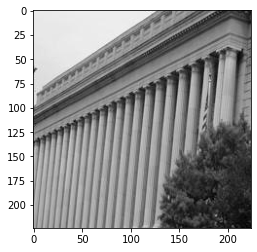

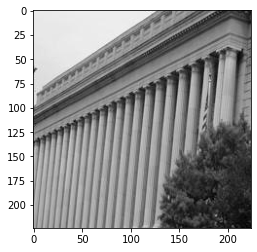

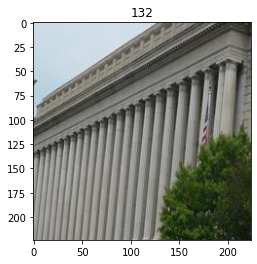

In [ ]:
# ab=ab.astype('int16')
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(l[0,:,:,0],cmap="gray")
plt.figure()
plt.imshow(l_c[0,:,:,0],cmap="gray")
plt.figure()
all=np.concatenate([l,ab],axis=-1)
plt.imshow(lab2rgb(all[0,...]))
plt.title(str(labelslist[np.argmax(y[0,...])]))

In [ ]:
# tf.image.random_crop(
#     (lab2rgb(all[0,...])*255), size=[64, 64, 3], seed=None, name=None
# )

# x,y=train_generator.__getitem__(1)
# print(x.shape,'\n',y.shape)
# plt.imshow(x[5,...])

In [ ]:
# training_generator = DataGenerator(train_dir,to_fit=True, batch_size=32, dim=[200,200],shuffle=True,total=-1)

In [ ]:
def mseloss(y_true,y_pred):
  # print('s of mse',y_pred,'e of mse')
  color_loss=keras.losses.mean_squared_error(y_true, y_pred)
  return color_loss

In [ ]:
def zeroloss(y_true,y_pred):
  # print('s',y_pred,'e')
  class_loss=keras.losses.categorical_crossentropy(y_true, y_pred)
  return (class_loss)

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer='adam',loss=[mseloss,zeroloss],metrics=['acc'],run_eagerly=True)

In [ ]:
# testx=np.zeros([2,512,512,1])
# testxclass=np.zeros([2,224,224,1])
# print('input shape',testx.shape)
# [y1,y2]=model.predict([testx,testxclass])
# print('colors shape',y1.shape)
# print('classes shape',y2.shape)
# # y1.numpy()

In [ ]:
# mymodel=model((224,224,1),(224,224,1))
trygen=Mydata(train_dir,dimensions=256,batch_size=128)
[l,l_c],[ab,y]=trygen.__getitem__(0)

Found 36421 images belonging to 365 classes.


In [ ]:
l.shape

(64, 224, 224, 1)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# import shutil
# for i in range(300):
#   if not os.path.exists(os.path.join('./newtry',str(i))):
#     print(os.path.join('./newtry',str(i)),' created.')
#     shutil.copytree(os.path.join('./val',str(i)),os.path.join('./newtry',str(i)))

In [ ]:
# model.fit(x=[l,l],y=[ab,y],epochs=40,verbose=1)
model.fit(trygen,epochs=2,verbose=1)

Epoch 1/2
 31/570 [>.............................] - ETA: 32:31 - loss: 1.0596 - up_sampling2d_2_loss: 0.0087 - classesoutput_loss: 1.0509 - up_sampling2d_2_acc: 0.6953 - classesoutput_acc: 0.7443

KeyboardInterrupt: ignored

In [ ]:
# model.save('/content/drive/MyDrive/colorize/colorize_v2_12_multiscale.h5')

In [ ]:
# del model

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/colorize/colorize_v2_12_multiscale.h5',custom_objects={"mseloss":mseloss,"zeroloss":zeroloss,"customrepeat":customrepeat,"customreshape":customreshape})

In [ ]:
# testgen=Mydata(test_dir)
testgen=Mydata(train_dir,batch_size=16,dimensions=224)

Found 1723 images belonging to 12 classes.


Text(0.5, 1.0, 'result 266')

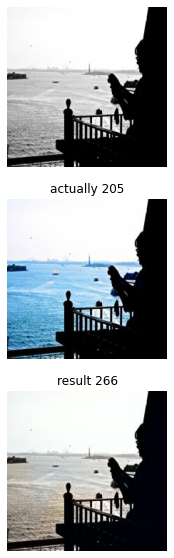

In [ ]:
[l,l_c],[ab,y]=trygen.__getitem__(0)
# [l1,l1],[ab1,y1]=trygen.__getitem__(1)
c=0


pred=model.predict([l,l_c])
# print(pred[0])
pred[0]=pred[0]*128
l=(l*100)
ab=(ab*128)
# ab=ab.astype('int16')
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 10))
fig.add_subplot(3,1,1)
plt.imshow(l[c,:,:,0],cmap="gray")
plt.axis('off')

all=np.concatenate([l,ab],axis=-1)
fig.add_subplot(3,1,2)
plt.imshow(lab2rgb(all[c,...]))
plt.axis('off')
plt.title('actually '+str(labelslist[np.argmax(y[c,...])]))

out=np.concatenate([l,pred[0]],axis=-1)
fig.add_subplot(3,1,3)
plt.imshow(lab2rgb(out[c,...]))
plt.axis('off')
plt.title('result '+str(labelslist[np.argmax(pred[1][c,...])]))

In [ ]:
# labelslist=['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '23', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '24', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '25', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '26', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '27', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '28', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '29', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '3', '30', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '31', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '32', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '33', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '34', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '35', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '36', '360', '361', '362', '363', '364', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

(512, 512, 3)


Text(0.5, 1.0, 'result 141')

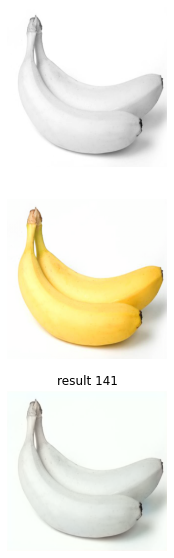

In [ ]:
# x=PIL.Image.open('/content/maria-lysenko-X-t_Rc3s1oQ-unsplash.jpg')
# x=PIL.Image.open('/content/maria-lysenko-mjaMxrxNMHY-unsplash.jpg')
x=PIL.Image.open('banana7.jpg')
# x=PIL.Image.open('/content/forest_513162(720).jpg')
# x=PIL.Image.open('/content/skyforest.jpg')
resolution=512
x_color=x.resize((resolution,resolution))

x_class=x.resize((224,224))
x_color=np.array(x_color)
x_class=np.array(x_class)
x_color=x_color/255
x_class=x_class/255
l=rgb2lab(x_color)[...,0:1]
ab=rgb2lab(x_color)[...,1:]
l=l.reshape([1,resolution,resolution,1])/100
ab=ab.reshape([1,resolution,resolution,2])/128

l_c=rgb2lab(x_class)[...,0:1]
l_c=l_c.reshape([1,224,224,1])/100
c=0
pred=model.predict([l,l_c])
pred[0]=pred[0]*128
l=(l*100)
ab=(ab*128)
# ab=ab.astype('int16')
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 10))
fig.add_subplot(3,1,1)
plt.imshow(l[0,:,:,0],cmap="gray")
plt.axis('off')

all=np.concatenate([l,ab],axis=-1)
fig.add_subplot(3,1,2)
plt.imshow(lab2rgb(all[0,...]))
plt.axis('off')


out=np.concatenate([l,pred[0]],axis=-1)
fig.add_subplot(3,1,3)
print(lab2rgb(out[0,...]).shape)
plt.imshow(lab2rgb(out[0,...]))
plt.axis('off')
plt.title('result '+str(labelslist[np.argmax(pred[1][c,...])]))

In [ ]:
out=lab2rgb(out[0,...])*255
out=out.astype(np.uint8)
print(out.shape)
resultimg=PIL.Image.fromarray(out)
resultimg.save('result'+str(labelslist[np.argmax(pred[1][c,...])])+str(resolution)+".jpg")

(512, 512, 3)


In [ ]:
print(out.shape)

(1024, 1024, 3)
